## Introduction

<div style="text-align: justify;">

The objective of this project is to analyze the effectiveness of implementing a dollar-cost averaging (DCA) investment strategy on the cryptocurrency asset, Bitcoin. DCA is a strategy where an investor divides a fixed amount of money to be invested into equal parts, and invests that money at regular intervals, regardless of the price of the asset. The goal of this project is to determine if using a DCA strategy can potentially reduce the impact of volatility and increase overall returns when investing in Bitcoin. The project will use historical data from the years 2013-2018. To analyze the performance of a DCA strategy on Bitcoin. With one period of **halving** in between.
    
The complete report is published on [RPubs](http://rpubs.com/camello_7/994438)

</div>

### Database

In [1]:
# Load the libraries ggplot2 and tidyverse
library(ggplot2)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
✔ purrr   0.3.5      
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
# Load the file coin_Bitcoin.csv
btc_db <- read.csv("/kaggle/input/cryptocurrencypricehistory/coin_Bitcoin.csv")
# Look for the structure of data base
str(btc_db)

'data.frame':	2991 obs. of  10 variables:
 $ SNo      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Name     : chr  "Bitcoin" "Bitcoin" "Bitcoin" "Bitcoin" ...
 $ Symbol   : chr  "BTC" "BTC" "BTC" "BTC" ...
 $ Date     : chr  "2013-04-29 23:59:59" "2013-04-30 23:59:59" "2013-05-01 23:59:59" "2013-05-02 23:59:59" ...
 $ High     : num  147 147 140 126 108 ...
 $ Low      : num  134 134.1 107.7 92.3 79.1 ...
 $ Open     : num  134 144 139 116 106 ...
 $ Close    : num  144.5 139 117 105.2 97.8 ...
 $ Volume   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Marketcap: num  1.60e+09 1.54e+09 1.30e+09 1.17e+09 1.09e+09 ...


### Development of the budget.

The following project was undertaken to determine the average income of a full-time employee in the United States over the last 20 years. The data source used for this analysis was an article from the website [Statista](https://www.statista.com/statistics/612519/average-annual-real-wages-united-states/). The analysis revealed that the average salary for a full-time employee in the United States over the last 20 years was $61,005.86. This information was crucial in understanding the current economic state and will be used as a benchmark for future analysis and comparison.

Based on the previous information, it was determined that the average monthly income is equivalent to $5,083.82. Therefore, it was determined that 10% of that income can be used to implement an investment strategy based on dollar-cost averaging (DCA).


Given a budget of USD 508.38 for investment, we will evaluate investment strategies based on different timeframes. The first strategy will involve making a single investment of the entire budget at the beginning of each month. The second strategy will involve making 4 investments of USD 127.10 at the beginning of each week within the month. The final strategy will involve making 28, 30, or 31 investments of USD 16.95 at the beginning of each day within the month




### Development of the code 

#### Accumulation of BTC using Dollar Cost Averaging.

The following is a step-by-step description of the code used to create the various columns to determine how much BTC is possible to acquire with the budget set for dollar cost averaging (DCA). That will later be used for data analysis and visualization.

In [3]:
# Creation of new columns, representing the amount of BTC purchased using the daily, weekly, and monthly budget determined previously, using the closing price of bitcoin for that day.

btc_db$btc_bought_daily <- 16.95 / btc_db$Close

btc_db$btc_bought_weekly <- 127.10 / btc_db$Close

btc_db$btc_bought_monthly <- 508.38 / btc_db$Close

#### The results of the daily accumulation 

In [4]:
# Creation of the column "sum_btc_daily" to determine the cumulative sum of each BTC purchase.

btc_db$sum_btc_daily <- c(0, head(btc_db$btc_bought_daily, -1) + tail(btc_db$sum_btc_daily, +1))

btc_db$sum_btc_daily <- cumsum(btc_db$btc_bought_daily)

With the columns created, an investment analysis is performed where 1825 purchases are executed, as 1825 days are equivalent to 5 years with daily purchases, resulting in an accumulation of **80.25 BTC.**

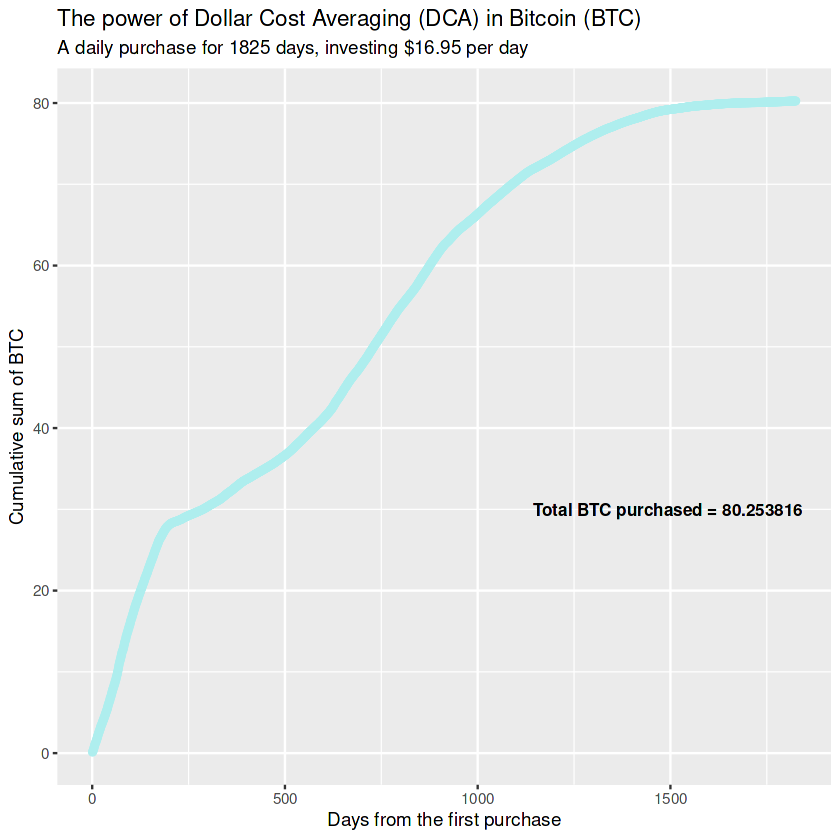

In [5]:
# Creating the visualization 

ggplot(data =btc_db[1:1825,], aes (x = 1:1825, y = sum_btc_daily)) +
  geom_jitter(color = "paleturquoise2") + ggtitle ("The power of Dollar Cost Averaging (DCA) in Bitcoin (BTC)", subtitle = "A daily purchase for 1825 days, investing $16.95 per day") + 
  xlab("Days from the first purchase" ) +
  ylab("Cumulative sum of BTC") +
  annotate("text", x = 1500, y = 30, label = "Total BTC purchased = 80.253816 ", 
           fontface = "bold", size = 3.5)

#### The results of the weekly accumulation 

In [6]:
# Create a vector to store values from "btc_bought" every 7 rows 
btc_weekly <- btc_db[seq(1, nrow(btc_db), by = 7), "btc_bought_weekly"]

# Perform the cumulative sum of the vector
sum_btc_weekly <- cumsum(btc_weekly)

# Creation of the new column with the cumulative sum of the vector every 7 rows
btc_db$sum_btc_weekly <- rep(0,nrow(btc_db))
btc_db$sum_btc_weekly[seq(1, nrow(btc_db), by = 7)] <- sum_btc_weekly

With the columns created, an investment analysis is performed where 260 purchases are executed, resulting in an accumulation of **86.04 BTC.**

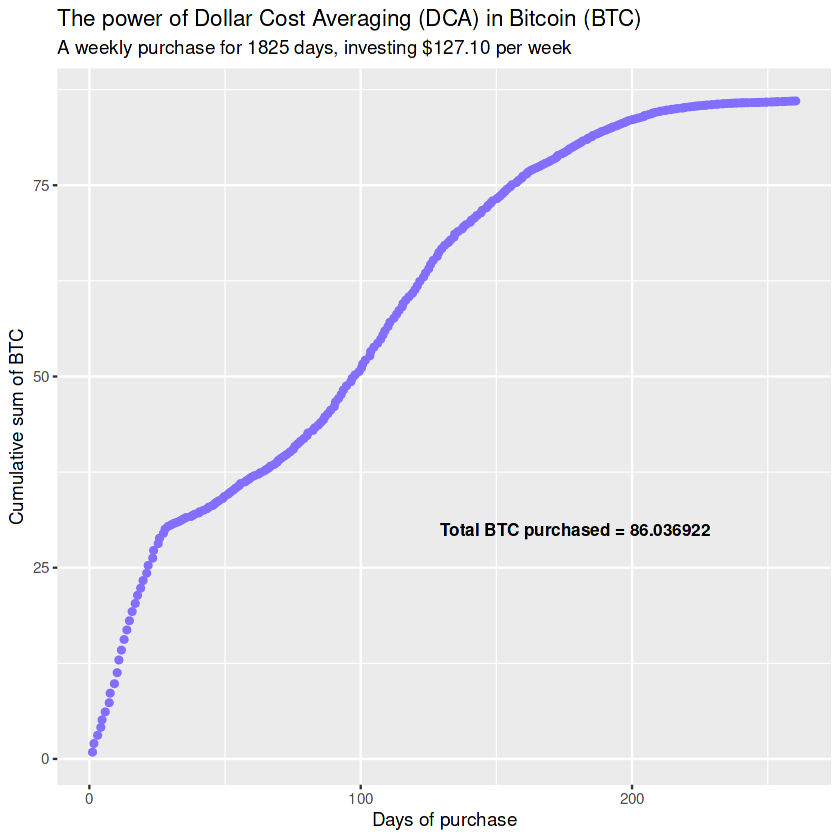

In [7]:
# Creating the visualization 

btc_db_filtered_weekly <- btc_db[btc_db$sum_btc_weekly != 0, ]

ggplot(data = btc_db_filtered_weekly[1:260,], aes (x = 1:260, y = sum_btc_weekly)) +
  geom_jitter(color = "slateblue1") + ggtitle ("The power of Dollar Cost Averaging (DCA) in Bitcoin (BTC)", subtitle = "A weekly purchase for 1825 days, investing $127.10 per week") + 
  xlab("Days of purchase" ) +
  ylab("Cumulative sum of BTC") +
  annotate("text", x = 180, y = 30, label = "Total BTC purchased = 86.036922 ", 
           fontface = "bold", size = 3.5)

#### The results of the monthly accumulation 

In [8]:
# Create a vector to store values from "btc_bought" every 30 rows 
btc_monthly <- btc_db[seq(1, nrow(btc_db), by = 30), "btc_bought_monthly"]

# Perform the cumulative sum of the vector
sum_btc_monthly <- cumsum(btc_monthly)

# Creation of the new column with the cumulative sum of the vector every 30 rows
btc_db$sum_btc_monthly <- rep(0,nrow(btc_db))
btc_db$sum_btc_monthly[seq(1, nrow(btc_db), by = 30)] <- sum_btc_monthly

With the columns created, an investment analysis is performed where 260 purchases are executed, resulting in an accumulation of **80.97 BTC.**

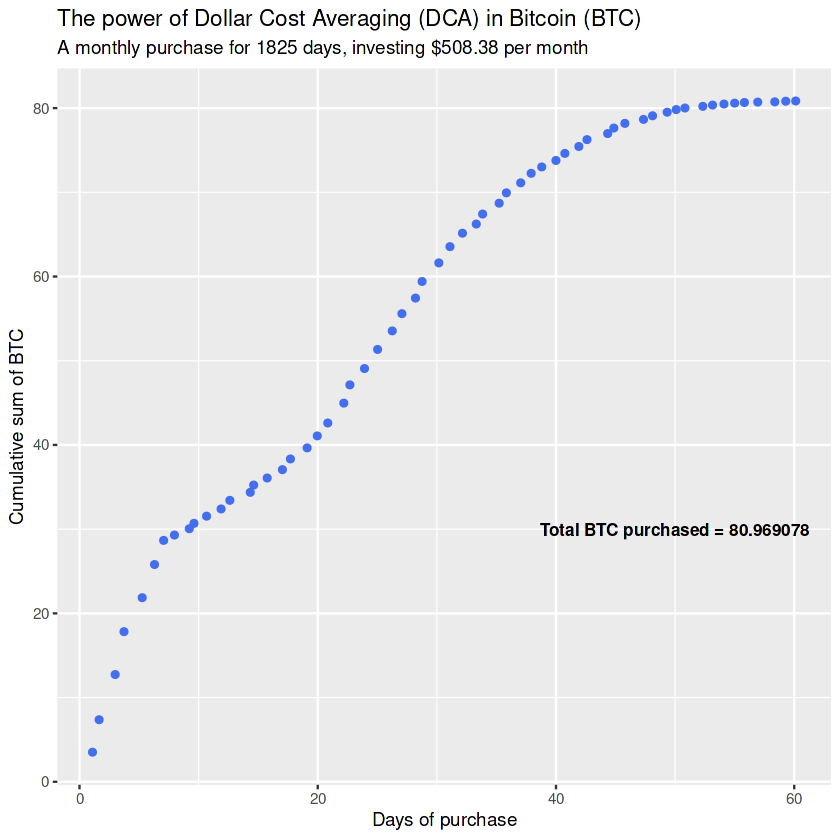

In [9]:
# Creating the visualization

btc_db_filtered_monthly <- btc_db[btc_db$sum_btc_monthly != 0, ]

ggplot(data = btc_db_filtered_monthly[1:60,], aes (x = 1:60, y = sum_btc_monthly)) +
  geom_jitter(color = "royalblue2") + ggtitle ("The power of Dollar Cost Averaging (DCA) in Bitcoin (BTC)", subtitle = "A monthly purchase for 1825 days, investing $508.38 per month") + 
  xlab("Days of purchase" ) +
  ylab("Cumulative sum of BTC") +
  annotate("text", x = 50, y = 30, label = "Total BTC purchased = 80.969078", 
           fontface = "bold", size = 3.5)

In summary, the data shows that there is no significant difference between implementing a DCA daily, weekly or monthly. With regard to weekly investment, there is a slight increase in accumulated BTC, which occurred because in the daily calculation, 1 year was used as 365 days, in the monthly calculation 1 year was used as 12 months, but in the weekly calculation 1 year is equivalent to 48 weeks.

### Dollar value of the accumulated BTC.

The following is a step-by-step description of the code used to create the various columns that will later be used for data analysis and visualization. **The investment analysis performed is for a 5-year time period.**

In [10]:
# Creation of new columns, representing the dollar value of the accumulated BTCs in daily, weekly and monthly timeframes, using the closing price of each BTC day.

btc_db$btc_bought_daily_usd <- btc_db$sum_btc_daily * btc_db$Close

btc_db$btc_bought_weekly_usd <- btc_db$sum_btc_weekly * btc_db$Close

btc_db$btc_bought_monthly_usd <- btc_db$sum_btc_monthly * btc_db$Close

#### Dollar value of the daily accumulation.


With the column created it is possible to determine the economic value in dollars of the progressive accumulation of the bitcoin asset, using as reference the closing value of each day of the asset, resulting in that at the end of the 1825th purchase in the daily plan a fiat value of $721,245.06.


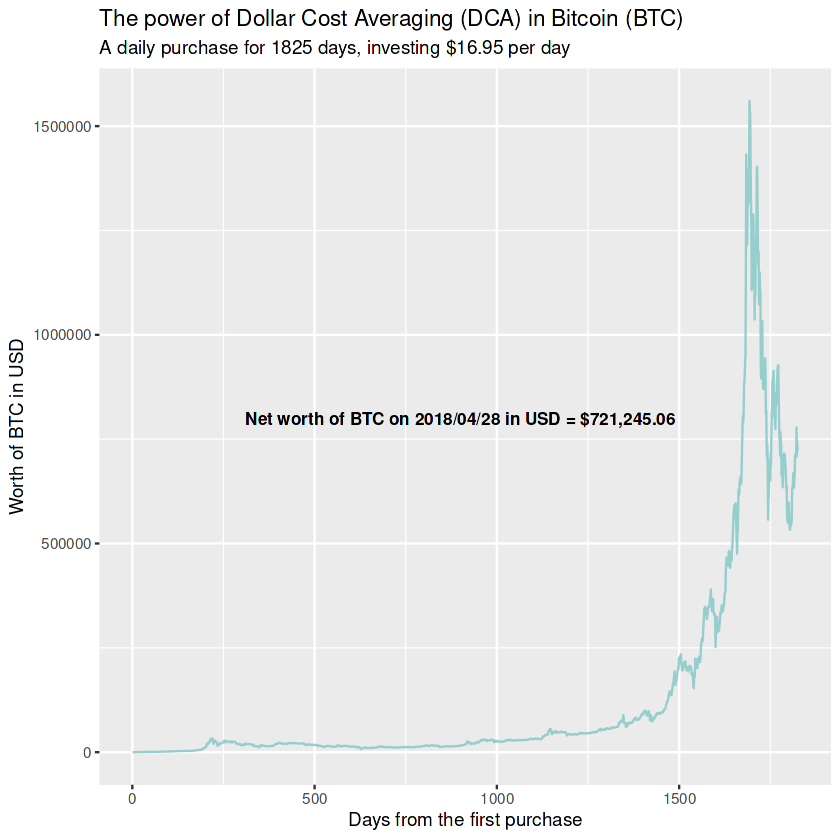

In [11]:
# Creating the visualization

ggplot(data = btc_db[1:1825,], aes (x = 1:1825, y = btc_bought_daily_usd)) +
  geom_line(color = "paleturquoise3") + ggtitle ("The power of Dollar Cost Averaging (DCA) in Bitcoin (BTC)", subtitle = "A daily purchase for 1825 days, investing $16.95 per day") + 
  xlab("Days from the first purchase") +
  ylab("Worth of BTC in USD") +
  annotate("text", x = 900, y = 800000, label = "Net worth of BTC on 2018/04/28 in USD = $721,245.06", 
           fontface = "bold", size = 3.5)

#### Dollar value of the weekly accumulation.


With the column created it is possible to determine the economic value in dollars of the progressive accumulation of the bitcoin asset, using as reference the closing value of each day of the asset, resulting in that at the end of the 260th purchase in the weekly plan a fiat value of $768,385.42.


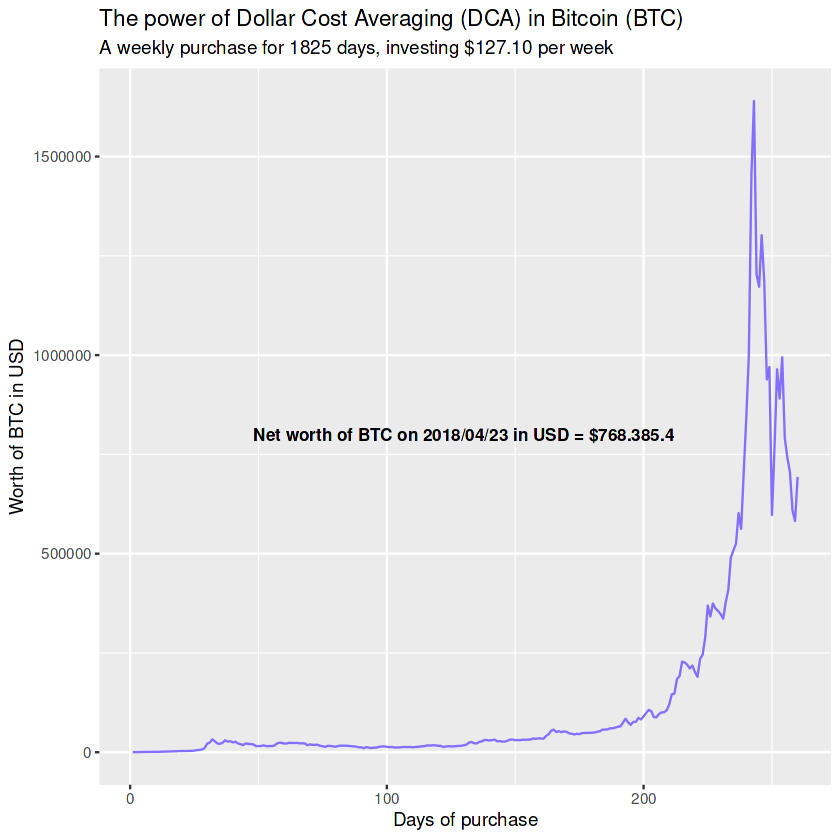

In [12]:
# Creating the visualization

btc_db_filtered_weekly_usd <- btc_db[btc_db$btc_bought_weekly_usd != 0, ]

ggplot(data = btc_db_filtered_weekly_usd[1:260,], aes (x = 1:260, y = btc_bought_weekly_usd)) +
  geom_line(color = "slateblue1") + ggtitle ("The power of Dollar Cost Averaging (DCA) in Bitcoin (BTC)", subtitle = "A weekly purchase for 1825 days, investing $127.10 per week") + 
  xlab("Days of purchase" ) +
  ylab("Worth of BTC in USD") +
  annotate("text", x = 130, y = 800000, label = "Net worth of BTC on 2018/04/23 in USD = $768.385.4",
           fontface = "bold", size = 3.5)

#### Dollar value of the monthly accumulation.
<div style="text-align: justify;">
With the column created, it is possible to determine the economic value in dollars of the progressive accumulation of the bitcoin asset, using the closing value of each day of the asset as a reference, resulting in that at the end of the 60th purchase in the monthly plan, a fiat value of $788,951.36 is reached.
</div>

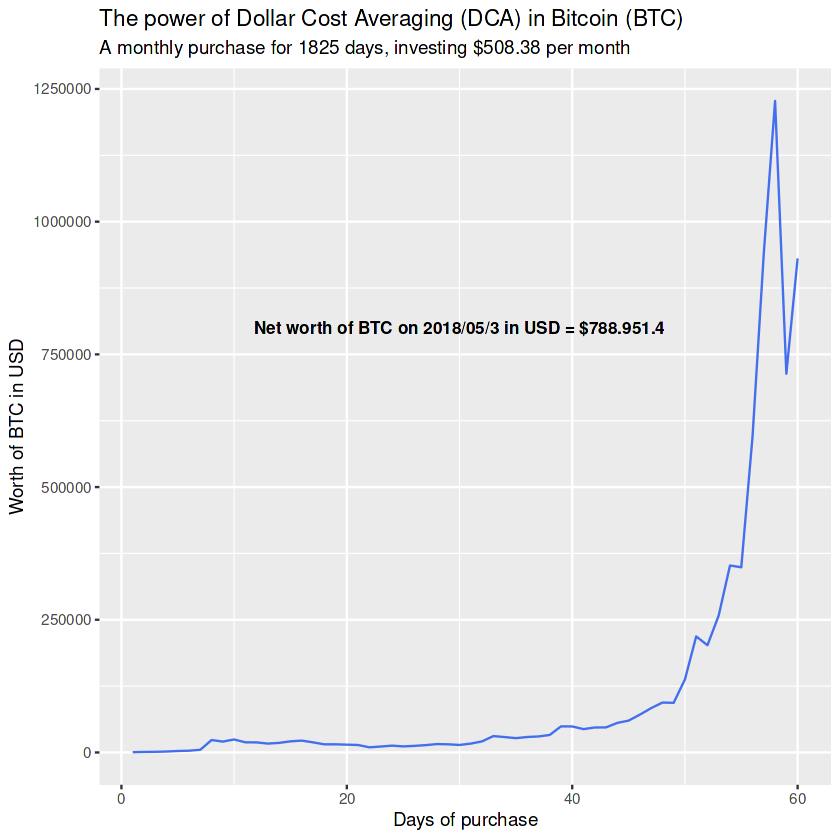

In [13]:
# Creating the visualization 

btc_db_filtered_monthly_usd <- btc_db[btc_db$btc_bought_monthly_usd  != 0, ]

ggplot(data = btc_db_filtered_monthly_usd[1:60,], aes (x = 1:60, y = btc_bought_monthly_usd)) +
  geom_line(color = "royalblue2") + ggtitle ("The power of Dollar Cost Averaging (DCA) in Bitcoin (BTC)", subtitle = "A monthly purchase for 1825 days, investing $508.38 per month") + 
  xlab("Days of purchase" ) +
  ylab("Worth of BTC in USD") +
  annotate("text", x = 30, y = 800000, label = "Net worth of BTC on 2018/05/3 in USD = $788.951.4", 
           fontface = "bold", size = 3.5)

### Summary of the fiat currency value dollar, of the BTCs accumulated through the implementation of DCA. 

#### Comparison of investment against unrealized profit.

<div style="text-align: justify;">
In the following analysis, a table is presented which compares the investment made in the Bitcoin (BTC) asset against unrealized profit at the last day of purchase of each timeframe. The data is grouped into three distinct timeframes: daily, weekly, and monthly, in order to evaluate the performance of the Dollar-Cost Averaging (DCA) strategy over a 5-year period. This provides a comprehensive overview of the results obtained from the implementation of the DCA strategy and allows for a deeper understanding of the potential returns on investment in the BTC asset.
 </div>
 
#### Unrealized profit and ROI.

<div style="text-align: justify;">
In summary, the following table presents the most important aspects of the second part of the analysis, where the total investment made, unrealized returns, and return on investment (ROI) can be observed, all in their different timeframes over a five-year period. The table highlights the performance of the dollar-cost averaging (DCA) strategy in different timeframes, which provides valuable insights for investors looking to make informed decisions about their investments in the Bitcoin (BTC) asset. The results of the analysis show that the DCA strategy can generate high returns on investment, with the ROI exceeding 2000% across all timeframes.

</div>
 

## Conclusions.

<div style="text-align: justify;">

* 1. Investing 10% of the average full-time employee salary in the US in the BTC cryptocurrency through the DCA strategy can change one's life completely.

* 2. It was determined that there is no significant difference between performing a DCA with daily, monthly, or weekly purchases, any timeframe works optimally.

* 3. It was determined that the Return of investment (ROI) after 5 years of investment exceeds 2000% based on the unrealized returns on the last day of purchases in each time frame (daily, weekly, monthly).

</div>

## Attachment

As shown below, the general structure of the database is presented

In [14]:
str(btc_db)

'data.frame':	2991 obs. of  19 variables:
 $ SNo                   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Name                  : chr  "Bitcoin" "Bitcoin" "Bitcoin" "Bitcoin" ...
 $ Symbol                : chr  "BTC" "BTC" "BTC" "BTC" ...
 $ Date                  : chr  "2013-04-29 23:59:59" "2013-04-30 23:59:59" "2013-05-01 23:59:59" "2013-05-02 23:59:59" ...
 $ High                  : num  147 147 140 126 108 ...
 $ Low                   : num  134 134.1 107.7 92.3 79.1 ...
 $ Open                  : num  134 144 139 116 106 ...
 $ Close                 : num  144.5 139 117 105.2 97.8 ...
 $ Volume                : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Marketcap             : num  1.60e+09 1.54e+09 1.30e+09 1.17e+09 1.09e+09 ...
 $ btc_bought_daily      : num  0.117 0.122 0.145 0.161 0.173 ...
 $ btc_bought_weekly     : num  0.879 0.914 1.086 1.208 1.3 ...
 $ btc_bought_monthly    : num  3.52 3.66 4.35 4.83 5.2 ...
 $ sum_btc_daily         : num  0.117 0.239 0.384 0.545 0.719 ...
 $ sum_btc_we